In [1]:
from load_data import loadData
from logger import readYaml
from process_data import normData, countLabel, sampleMask
from process_data import superpixels
from utils import parser, performance, mkdir, getDevice, getOptimizer, getLoss, setupSeed, getMetrics
from show import show_data, show_mask, plot_slic
from model import SegNet
import torch.utils.tensorboard as tb
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
data_name = 'Indian_pines'
yaml_path = 'dataset/data_info.yaml'

In [3]:
data, label = loadData(readYaml(yaml_path), data_name)
print('data shape:', data.shape)
ndata = normData(data)

seed = setupSeed(None)
tb_dir, model_dir, img_dir, png_path = mkdir(data_name, 'DMSGCN')
count, class_num = countLabel(label)
train_mask, test_mask = sampleMask(label, count, 0.15)
show_mask(train_mask, label, data_name, 'train', png_path)
show_mask(test_mask, label, data_name, 'test', png_path)

data shape: (145, 145, 200)
Random seed: 3713557415
train_num: [30, 30, 30, 30, 30, 30, 15, 30, 15, 30, 30, 30, 30, 30, 30, 30]
test_num: [16, 1398, 800, 207, 453, 700, 13, 448, 5, 942, 2425, 563, 175, 1235, 356, 63]


In [4]:
def show(data):
    plt.imshow(data)
    plt.show()
    plt.close()

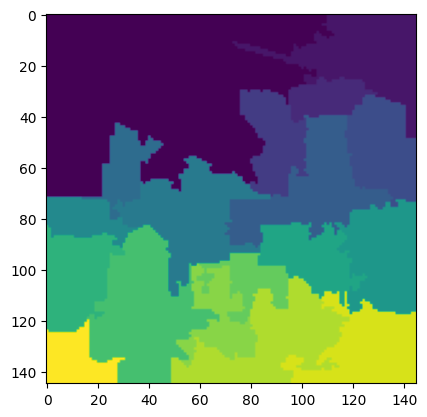

In [5]:
seg_index1, block_num1 = superpixels(ndata, 'SLIC')
show(seg_index1)

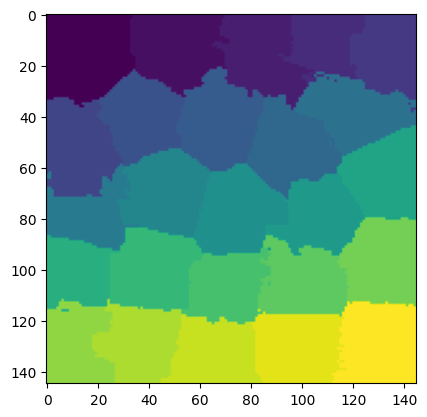

In [6]:
seg_index2, block_num2 = superpixels(ndata, 'SLICO')
show(seg_index2)

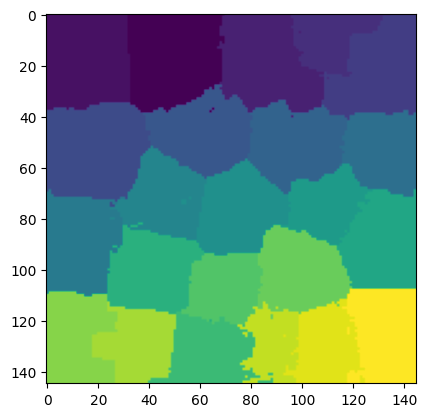

In [7]:
seg_index3, block_num3 = superpixels(ndata, 'SLICS')
show(seg_index3)

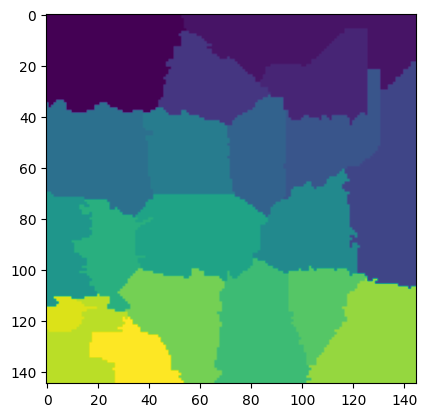

In [8]:
seg_index4, block_num4 = superpixels(ndata, 'MSLIC')
show(seg_index4)

/Users/qingjin/Documents/毕业设计/6.coding/process_data/superpixels.py:21: RuntimeWarning: Got image with third dimension of 200. This image will be interpreted as a multichannel 2d image, which may not be intended.
  seg_index = felzenszwalb(data, scale=scale, sigma=sigma, min_size=min_size)


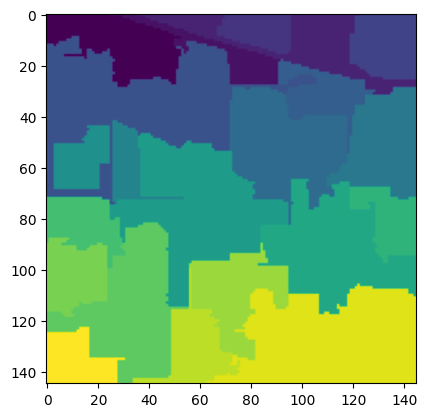

In [9]:
seg_index5, block_num5 = superpixels(ndata, 'Felzenszwalb')
show(seg_index5)

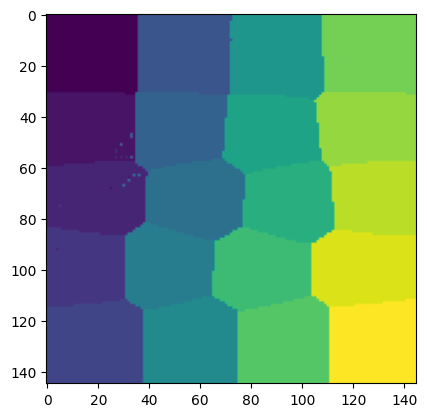

In [10]:
seg_index6, block_num6 = superpixels(ndata, 'LSC')
show(seg_index6)